In [1]:
%%capture
%matplotlib inline
import matplotlib.pyplot as plt
import mdp
import numpy as np
import sklearn as sl
from sklearn import datasets
import system_parameters
import scipy
import scipy.interpolate as interpolate
# tabular layout from https://stackoverflow.com/questions/25830780/tabular-legend-layout-for-matplotlib
from matplotlib.font_manager import FontProperties
from matplotlib.patches import Rectangle
from utils import *
import time
from datetime import datetime

In [2]:
def plot_mnist_errorbars(y1, ery1, y2, ery2, y3, ery3, samples_lengths, title1, title, style='-',
                         y_upper=0.53, y_lower=.285, x_upper=12.05, x_lower=3.95):
    y1 = np.array(y1); ery1 = np.array(ery1); y2 = np.array(y2); ery2 = np.array(ery2); y3 = np.array(y3);
    ery3 = np.array(ery3)
    fig = plt.figure(figsize=(7, 6)) 
    ax = plt.subplot(111)
    samples_lengths = [4, 6, 8, 10, 12]
    
    x = np.array(samples_lengths)

    ew = 0.3
    ct = 0.3
    
    im2 = ax.errorbar(samples_lengths, y1, ery1, capthick=ct, elinewidth=ew, color=get_kelly_colors()[4],  label="CNN-1", linestyle=style)
    im8 = ax.errorbar(samples_lengths, y2, ery2, capthick=ct, elinewidth=ew, color= get_kelly_colors()[5],  label="CNN-2", linestyle=style)
    im1 = ax.errorbar(samples_lengths, y3, ery3, capthick=ct, elinewidth=ew, color=get_kelly_colors()[1],  label="HiGSFA", linestyle=style)

    # create blank rectangle

    #Create organized list containing all handles for table. Extra re
    plt.xlabel(title1)
    plt.ylabel('Classification accuracy')
    plt.title(title)
    plt.legend(bbox_to_anchor=(0.875, -0.1), ncol=3)
    plt.xlim(x_lower, x_upper)
    plt.ylim(y_lower, y_upper)
    plt.show()


def plot_omniglot_errorbars(y1, ery1, y2, ery2, y3, ery3,
                            x1, erx1, x2, erx2, x3, erx3,
                            z1, erz1, z2, erz2, z3, erz3, samples_lengths, title1, title):
    
    fig = plt.figure(figsize=(7, 6)) 
    ax = plt.subplot(111)
    
    samples_lengths = samples_lengths
    
    y_12 = x1
    y_22 = x2
    y_22CNN2 = x3
    
    y_13 = z1
    y_23 = z2
    y_23CNN2 = z3
    x = np.array(samples_lengths)

    # example error bar values that vary with x-position
    error = 0.001 + 0.0005 * x
    ew = 0.3
    ct = 0.3
    im1 = ax.errorbar(samples_lengths, y1, ery1, capthick=ct, elinewidth=ew,  color=get_kelly_colors()[4],  label="HiGSFA")
    im2 = ax.errorbar(samples_lengths, y2, ery2, capthick=ct,elinewidth=ew,color=get_kelly_colors()[5],  label="CNN-1")
    im8 = ax.errorbar(samples_lengths, y3, ery3, capthick=ct,elinewidth=ew,color= get_kelly_colors()[1],  label="CNN-2")
    
    im4 = ax.errorbar(samples_lengths, x1, erx1,capthick=ct,  elinewidth=ew,color=get_kelly_colors()[4],  label="HiGSFA", linestyle="--")
    im5 = ax.errorbar(samples_lengths, x2, erx2,capthick=ct,  elinewidth=ew,color=get_kelly_colors()[5],  label="CNN-1", linestyle="--")
    im9 = ax.errorbar(samples_lengths, x3, erx3,capthick=ct,  elinewidth=ew,color=get_kelly_colors()[1],  label="CNN-2", linestyle="--")

    im6 = ax.errorbar(samples_lengths, z1, erz1,capthick=ct,  elinewidth=ew,color=get_kelly_colors()[4],  label="HiGSFA", linestyle="-.")
    im7 = ax.errorbar(samples_lengths, z2, erz2,capthick=ct,  elinewidth=ew,color=get_kelly_colors()[5],  label="CNN-1", linestyle="-.")
    im10 = ax.errorbar(samples_lengths, z3, erz3,capthick=ct,  elinewidth=ew,color=get_kelly_colors()[1],  label="CNN-2", linestyle="-.")


    # create blank rectangle
    extra = Rectangle((0, 0), 1, 1, fc="w", fill=True, edgecolor='none', linewidth=0)

    #Create organized list containing all handles for table. Extra represent empty space
    legend_handle = [
                     extra, extra, extra, extra, extra, 
                     extra, extra, im1, im2, im8, 
                     extra, extra, im4, im5, im9,  
                     extra,extra, im6, im7, im10]

    #Define the labels
    label_row_1 = ["", r"", r"CNN-1", r"CNN-2", r"HiGSFA"]
    label_j_1 = [r"#0"] 
    label_j_2 = [r"#1"]
    label_j_3 = [r"#2"]
    label_empty = [""]

    #organize labels for table construction
    legend_labels = np.concatenate([
                                    label_row_1,
                                    [""],
                                    label_j_1,
                                    label_empty * 4,
                                    label_j_2,
                                    label_empty * 4,
                                    label_j_3, 
                                    label_empty * 4,
                                   label_empty * 5])


    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])

    # Put a legend below current axis
    ax.legend(legend_handle, legend_labels, bbox_to_anchor=(1.3, 1.019),
              loc = 9, ncol = 4, shadow = True, handletextpad = -1.5)
    plt.xlabel(title1)
    plt.ylabel('Classification accuracy')
    plt.title(title)

    plt.text(1.38, 0.962,'Challenge',
         horizontalalignment='center',
         verticalalignment='center',
         transform = ax.transAxes,
            zorder = 10,
            fontsize=12)
    
    plt.xlim(3.95, 12.05)
    plt.ylim(0.3, 0.55)
    plt.show()


    
    #######################################


samples_lengths = [4, 6, 8, 10, 12]
samples_lengths = [3, 10, 20]

x = np.array(samples_lengths)
y_1 = [0.181578947368, 0.273684210526, 0.265789473684]
y_2 = [0.3315, 0.32575, 0.35525]
y_2CNN2 = [0.33025, 0.3555, 0.34175]

y_12 = [0.228947368421, 0.265789473684, 0.289473684211]
y_22 = [0.3125, 0.342, 0.38175]
y_22CNN2 = [0.318, 0.3395, 0.33325]

y_13 = [0.194736842105, 0.255263157895, 0.255263157895]
y_23 = [0.324, 0.37525, 0.39675]
y_23CNN2 = [0.3175, 0.3595, 0.35525]
title = "title"
title1 = "alphabets"
#plot_omniglot_errorbars(y_1, y_2, y_2CNN2, y_12, y_22, y_22CNN2, y_13, y_23, y_23CNN2, samples_lengths, title1,
#                         title)

In [3]:
total_successes = np.load("total_successes.npy")
total_lengths = np.load("total_lengths.npy")
total_accuracies = np.load("total_accuracies.npy")

In [4]:
nums = ["10", "12", "4", "6", "8"]
models = ["cnn_1", "cnn_2", "higsfa"]

In [5]:
def fix_omniglot_array(to_num):
    to_num[0], to_num[2] = to_num[2], to_num[0]
    to_num[1], to_num[3] = to_num[3], to_num[1]
    to_num[2], to_num[4] = to_num[4], to_num[2]
    to_num[3], to_num[4] = to_num[4], to_num[3]
    return to_num

In [6]:
omniglot_results = []
omniglot_stdev = []
for j in range(3):
    print("model: " + models[j])
    for i in range(3):
        print("challenge " + str(i))
        divided_matrix = np.divide(total_successes[j, i, :, 0, 1], total_lengths[j, i, :, 0, 1])
        to_num = np.nan_to_num(divided_matrix)
        fix_omniglot_array(to_num)
        interesting_accuracies = total_accuracies[j, i, :, 0, 1]
        interesting_accuracies = fix_omniglot_array(interesting_accuracies)
        print(to_num)
        omniglot_results.append(to_num)
        omniglot_stdev.append(interesting_accuracies)
        print(np.sum(to_num) / 9.0)
        print("\n")
omniglot_results = np.array(omniglot_results)
omniglot_stdev = np.array(omniglot_stdev)

model: cnn_1
challenge 0
[ 0.5083871   0.4883871   0.47645161  0.46516129  0.47935484]
0.268637992832


challenge 1
[ 0.40259843  0.43598425  0.43362205  0.43307087  0.43314961]
0.23760279965


challenge 2
[ 0.3556962   0.37455696  0.38189873  0.38708861  0.38088608]
0.208902953586


model: cnn_2
challenge 0
[ 0.42387097  0.45354839  0.45032258  0.44709677  0.4416129 ]
0.246272401434


challenge 1
[ 0.39732283  0.42480315  0.42086614  0.42314961  0.41740157]
0.231504811899


challenge 2
[ 0.36531646  0.37974684  0.38518987  0.38860759  0.39379747]
0.212517580872


model: higsfa
challenge 0
[ 0.39548387  0.40483871  0.42387097  0.42548387  0.42322581]
0.230322580645


challenge 1
[ 0.32913386  0.35338583  0.38472441  0.38645669  0.38905512]
0.204750656168


challenge 2
[ 0.29455696  0.31670886  0.34455696  0.35379747  0.35974684]
0.185485232068




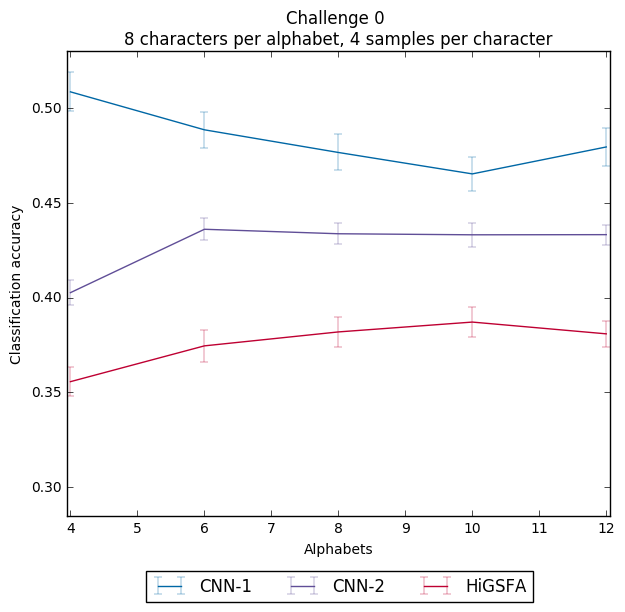

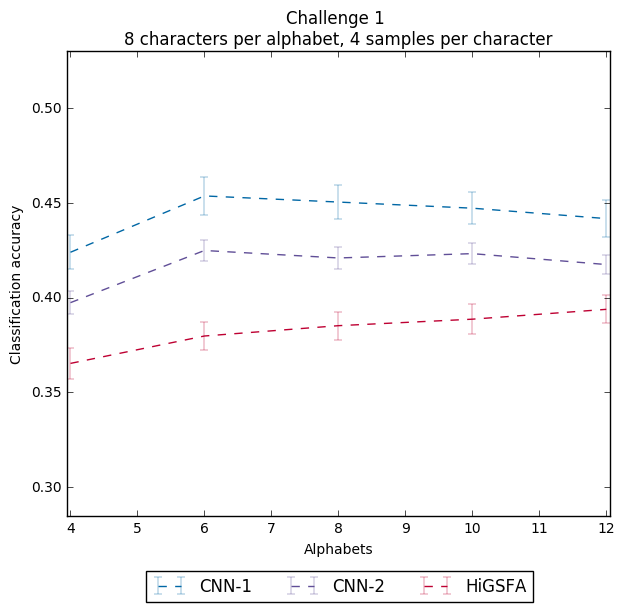

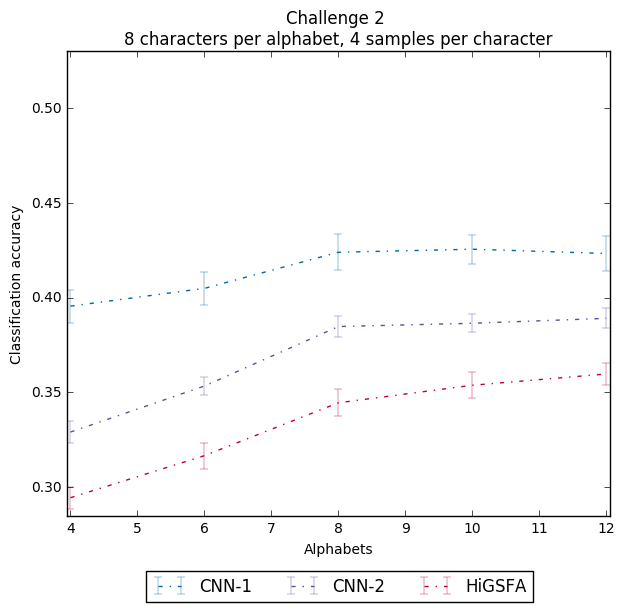

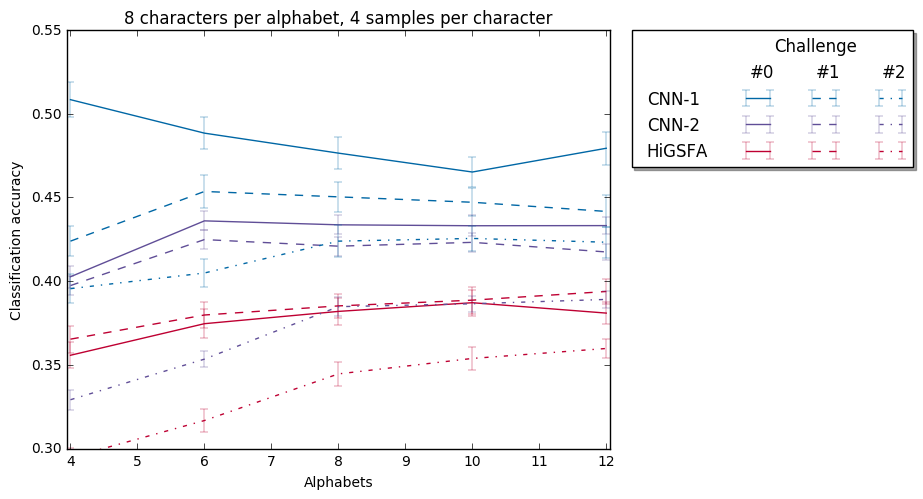

In [7]:
samples_lengths = [4, 6, 8, 10, 12]
title = "Alphabets"
title1 = "8 characters per alphabet, 4 samples per character"

plot_mnist_errorbars(omniglot_results[0], omniglot_stdev[0], omniglot_results[1], omniglot_stdev[1],
                         omniglot_results[2], omniglot_stdev[2], samples_lengths, title, 
                        "Challenge 0 \n" + title1 )
plot_mnist_errorbars(omniglot_results[3], omniglot_stdev[3], omniglot_results[4], omniglot_stdev[4],
                         omniglot_results[5], omniglot_stdev[5], samples_lengths, title, 
                        "Challenge 1 \n" + title1, '--')
plot_mnist_errorbars(omniglot_results[6], omniglot_stdev[6], omniglot_results[7], omniglot_stdev[7],
                         omniglot_results[8], omniglot_stdev[8], samples_lengths, title, 
                        "Challenge 2 \n" + title1 , '-.')


plot_omniglot_errorbars(omniglot_results[0], omniglot_stdev[0], omniglot_results[1], omniglot_stdev[1],
                         omniglot_results[2], omniglot_stdev[2],
                         omniglot_results[3], omniglot_stdev[3], omniglot_results[4], omniglot_stdev[4],
                         omniglot_results[5], omniglot_stdev[5],
                         omniglot_results[6], omniglot_stdev[6], omniglot_results[7], omniglot_stdev[7],
                         omniglot_results[8], omniglot_stdev[8], samples_lengths,
                         title,
                         title1)

In [8]:
omniglot_results = []
omniglot_stdev = []
for j in range(3):
    print("model: " + models[j])
    for i in range(3):
        print("challenge " + str(i))
        divided_matrix = np.divide(total_successes[j, i, :, 0, 0], total_lengths[j, i, :, 0, 0])
        to_num = np.nan_to_num(divided_matrix)
        fix_omniglot_array(to_num)
        interesting_accuracies = total_accuracies[j, i, :, 0, 0]
        interesting_accuracies = fix_omniglot_array(interesting_accuracies)
        print(to_num)
        omniglot_results.append(to_num)
        omniglot_stdev.append(interesting_accuracies)
        print(np.sum(to_num) / 9.0)
        print("\n")
omniglot_results = np.array(omniglot_results)
omniglot_stdev = np.array(omniglot_stdev)

model: cnn_1
challenge 0
[ 0.48629921  0.46377953  0.38440945  0.39149606  0.36755906]
0.23261592301


challenge 1
[ 0.47322581  0.47290323  0.39225806  0.38935484  0.36870968]
0.2329390681


challenge 2
[ 0.37848101  0.38506329  0.34050633  0.34392405  0.31417722]
0.195794655415


model: cnn_2
challenge 0
[ 0.4596063   0.47385827  0.46992126  0.47551181  0.4807874 ]
0.262187226597


challenge 1
[ 0.46096774  0.48580645  0.4816129   0.47612903  0.47225806]
0.264086021505


challenge 2
[ 0.41050633  0.42531646  0.42594937  0.43303797  0.42303797]
0.235316455696


model: higsfa
challenge 0
[ 0.38354331  0.40771654  0.4123622   0.4323622   0.42007874]
0.22845144357


challenge 1
[ 0.38612903  0.41193548  0.42096774  0.4283871   0.43129032]
0.230967741935


challenge 2
[ 0.35417722  0.36556962  0.39088608  0.38670886  0.40101266]
0.210928270042




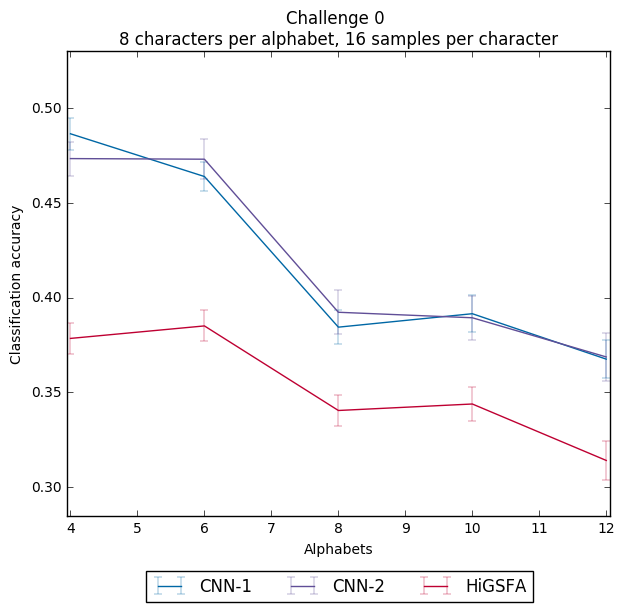

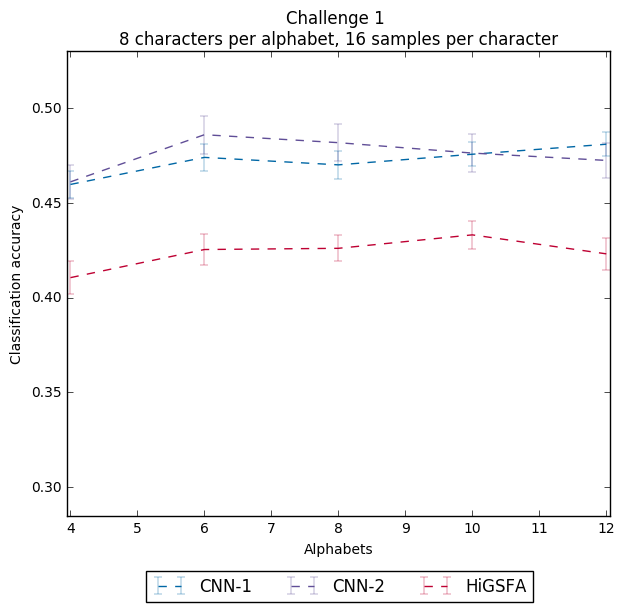

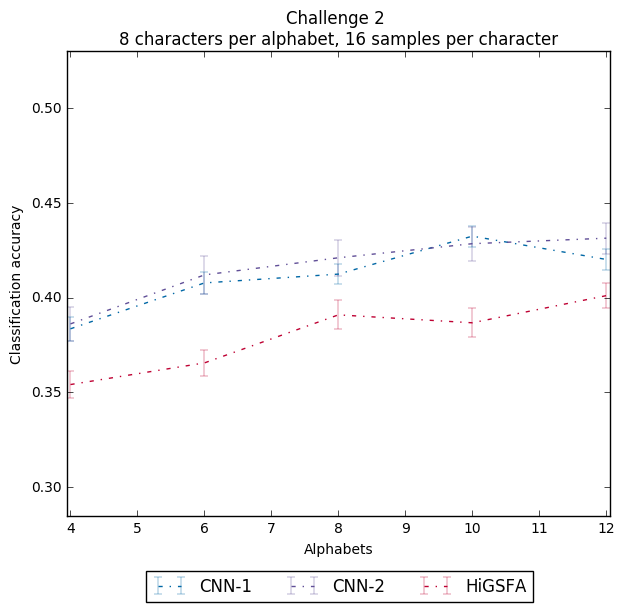

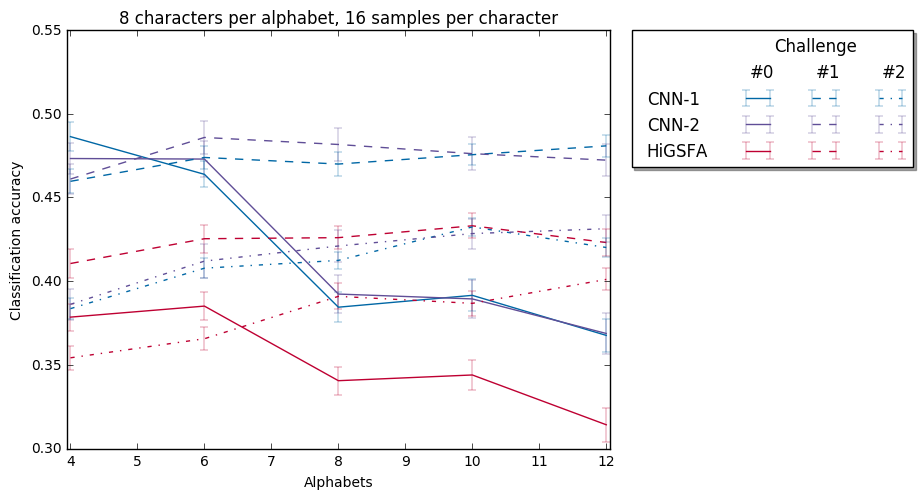

In [9]:
samples_lengths = [4, 6, 8, 10, 12]
title = "Alphabets"
title1 = "8 characters per alphabet, 16 samples per character"
plot_mnist_errorbars(omniglot_results[0], omniglot_stdev[0], omniglot_results[1], omniglot_stdev[1],
                         omniglot_results[2], omniglot_stdev[2], samples_lengths, title, 
                        "Challenge 0 \n" + title1 )
plot_mnist_errorbars(omniglot_results[3], omniglot_stdev[3], omniglot_results[4], omniglot_stdev[4],
                         omniglot_results[5], omniglot_stdev[5], samples_lengths, title, 
                        "Challenge 1 \n" + title1, '--')
plot_mnist_errorbars(omniglot_results[6], omniglot_stdev[6], omniglot_results[7], omniglot_stdev[7],
                         omniglot_results[8], omniglot_stdev[8], samples_lengths, title, 
                        "Challenge 2 \n" + title1 , '-.')
plot_omniglot_errorbars(omniglot_results[0], omniglot_stdev[0], omniglot_results[1], omniglot_stdev[1],
                         omniglot_results[2], omniglot_stdev[2],
                         omniglot_results[3], omniglot_stdev[3], omniglot_results[4], omniglot_stdev[4],
                         omniglot_results[5], omniglot_stdev[5],
                         omniglot_results[6], omniglot_stdev[6], omniglot_results[7], omniglot_stdev[7],
                         omniglot_results[8], omniglot_stdev[8], samples_lengths,
                         title,
                         title1)

In [10]:
omniglot_results = []
omniglot_stdev = []
for j in range(3):
    print("model: " + models[j])
    for i in range(3):
        print("challenge " + str(i))
        divided_matrix = np.divide(total_successes[j, i, 4, :, 1], total_lengths[j, i, 4, :, 1])
        to_num = np.nan_to_num(divided_matrix)
        fix_omniglot_array(to_num)
        interesting_accuracies = total_accuracies[j, i, 4, :, 1]
        interesting_accuracies = fix_omniglot_array(interesting_accuracies)
        print(to_num)
        omniglot_results.append(to_num)
        omniglot_stdev.append(interesting_accuracies)
        print(np.sum(to_num) / 9.0)
        print("\n")
omniglot_results = np.array(omniglot_results)
omniglot_stdev = np.array(omniglot_stdev)

model: cnn_1
challenge 0
[ 0.51774194  0.47903226  0.4883871   0.47645161  0.47064516]
0.270250896057


challenge 1
[ 0.43503937  0.43905512  0.44614173  0.43362205  0.41929134]
0.241461067367


challenge 2
[ 0.38481013  0.38025316  0.39582278  0.38189873  0.37202532]
0.212756680731


model: cnn_2
challenge 0
[ 0.44225806  0.4416129   0.44903226  0.45032258  0.42677419]
0.245555555556


challenge 1
[ 0.41913386  0.42929134  0.42299213  0.42086614  0.40511811]
0.233044619423


challenge 2
[ 0.38189873  0.37405063  0.39556962  0.38518987  0.38886076]
0.213952180028


model: higsfa
challenge 0
[ 0.41645161  0.40741935  0.41612903  0.42387097  0.41225806]
0.230681003584


challenge 1
[ 0.3396063   0.36385827  0.36913386  0.38472441  0.38330709]
0.204514435696


challenge 2
[ 0.31582278  0.33797468  0.34126582  0.34455696  0.35379747]
0.188157524613




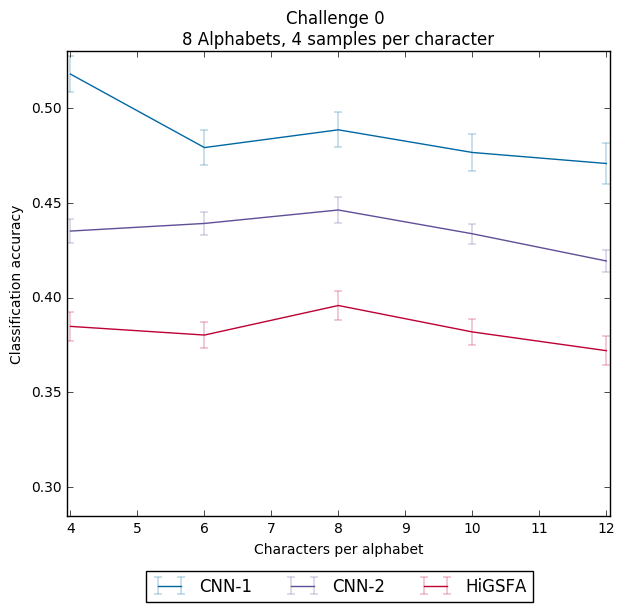

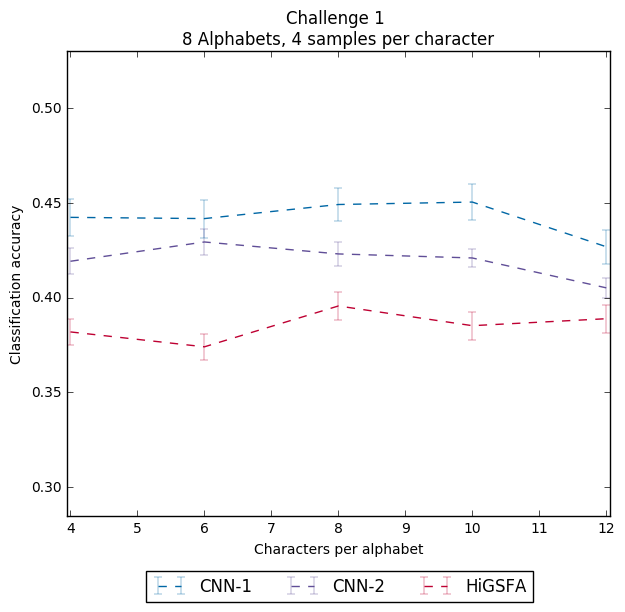

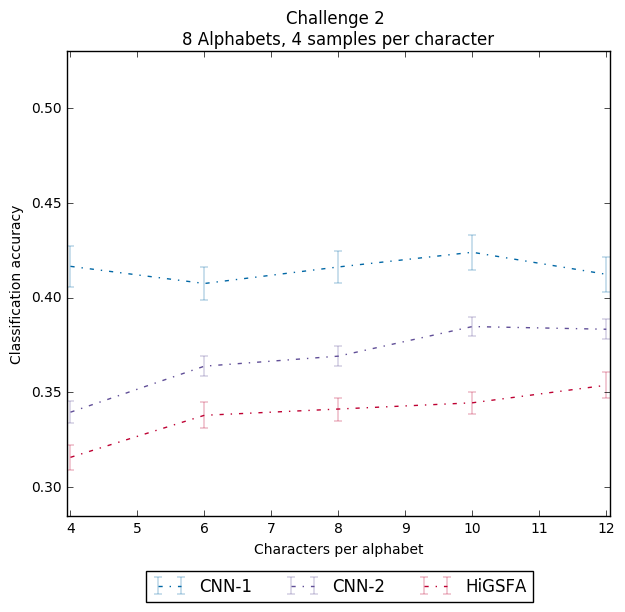

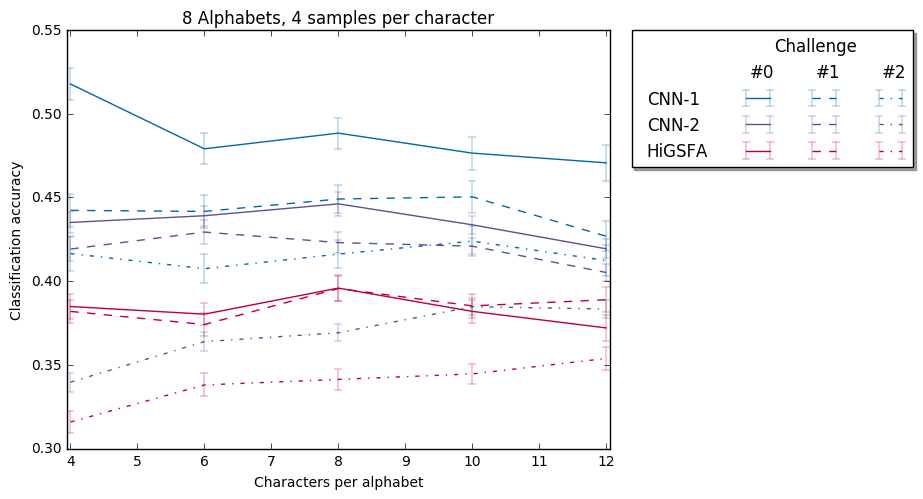

In [11]:
samples_lengths = [4, 6, 8, 10, 12]
title = "Characters per alphabet"
title1 = "8 Alphabets, 4 samples per character"
plot_mnist_errorbars(omniglot_results[0], omniglot_stdev[0], omniglot_results[1], omniglot_stdev[1],
                         omniglot_results[2], omniglot_stdev[2], samples_lengths, title, 
                        "Challenge 0 \n" + title1 )
plot_mnist_errorbars(omniglot_results[3], omniglot_stdev[3], omniglot_results[4], omniglot_stdev[4],
                         omniglot_results[5], omniglot_stdev[5], samples_lengths, title, 
                        "Challenge 1 \n" + title1, '--')
plot_mnist_errorbars(omniglot_results[6], omniglot_stdev[6], omniglot_results[7], omniglot_stdev[7],
                         omniglot_results[8], omniglot_stdev[8], samples_lengths, title, 
                        "Challenge 2 \n" + title1 , '-.')
plot_omniglot_errorbars(omniglot_results[0], omniglot_stdev[0], omniglot_results[1], omniglot_stdev[1],
                         omniglot_results[2], omniglot_stdev[2],
                         omniglot_results[3], omniglot_stdev[3], omniglot_results[4], omniglot_stdev[4],
                         omniglot_results[5], omniglot_stdev[5],
                         omniglot_results[6], omniglot_stdev[6], omniglot_results[7], omniglot_stdev[7],
                         omniglot_results[8], omniglot_stdev[8], samples_lengths,
                         title,
                         title1)

In [12]:
omniglot_results = []
omniglot_stdev = []
for j in range(3):
    print("model: " + models[j])
    for i in range(3):
        print("challenge " + str(i))
        divided_matrix = np.divide(total_successes[j, i, 4, :, 0], total_lengths[j, i, 4, :, 0])
        to_num = np.nan_to_num(divided_matrix)
        fix_omniglot_array(to_num)
        interesting_accuracies = total_accuracies[j, i, 4, :, 0]
        interesting_accuracies = fix_omniglot_array(interesting_accuracies)
        print(to_num)
        omniglot_results.append(to_num)
        omniglot_stdev.append(interesting_accuracies)
        print(np.sum(to_num) / 9.0)
        print("\n")
omniglot_results = np.array(omniglot_results)
omniglot_stdev = np.array(omniglot_stdev)

model: cnn_1
challenge 0
[ 0.5096063   0.4707874   0.43724409  0.38440945  0.35818898]
0.240026246719


challenge 1
[ 0.50483871  0.45290323  0.44451613  0.39225806  0.35967742]
0.23935483871


challenge 2
[ 0.40253165  0.38506329  0.38278481  0.34050633  0.3164557 ]
0.203037974684


model: cnn_2
challenge 0
[ 0.47984252  0.48740157  0.47834646  0.46992126  0.45740157]
0.26365704287


challenge 1
[ 0.47903226  0.49709677  0.48        0.4816129   0.47419355]
0.267992831541


challenge 2
[ 0.42063291  0.43037975  0.43012658  0.42594937  0.41683544]
0.235991561181


model: higsfa
challenge 0
[ 0.41275591  0.42228346  0.41299213  0.4123622   0.41669291]
0.230787401575


challenge 1
[ 0.41258065  0.42129032  0.42225806  0.42096774  0.42193548]
0.233225806452


challenge 2
[ 0.37063291  0.3735443   0.38        0.39088608  0.39708861]
0.212461322082




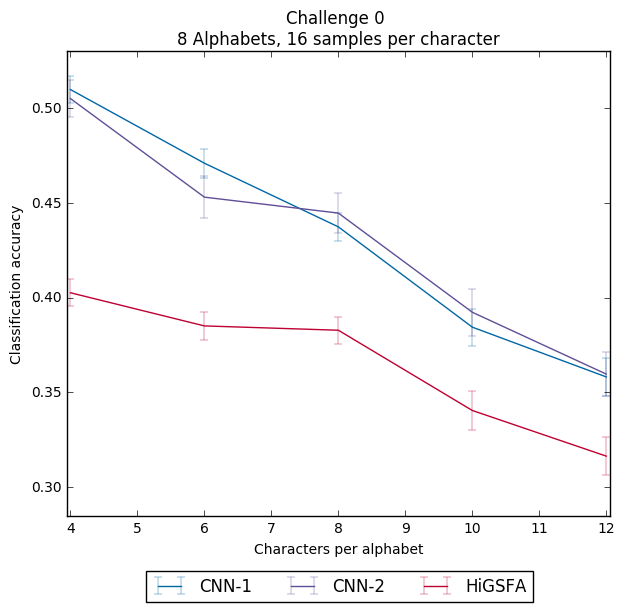

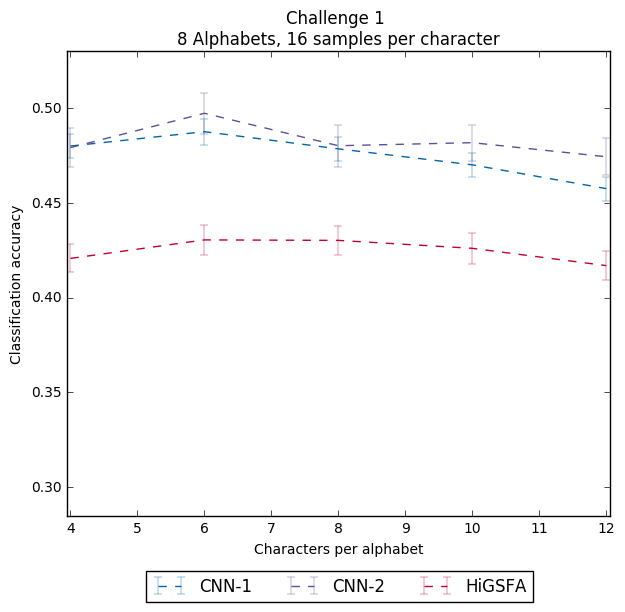

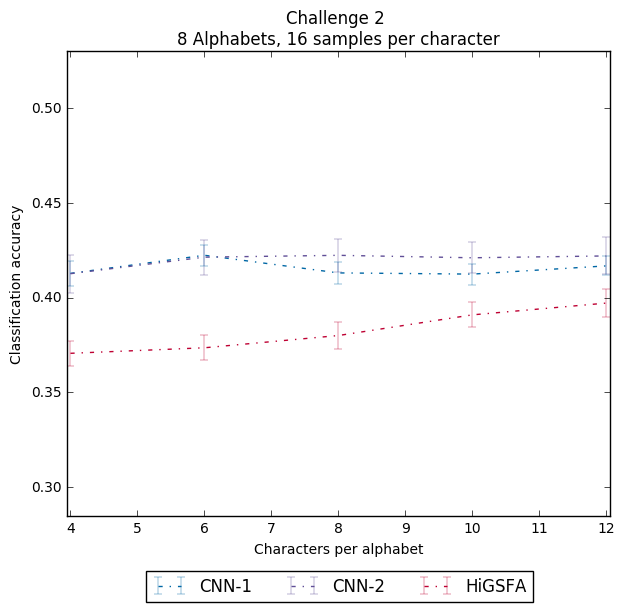

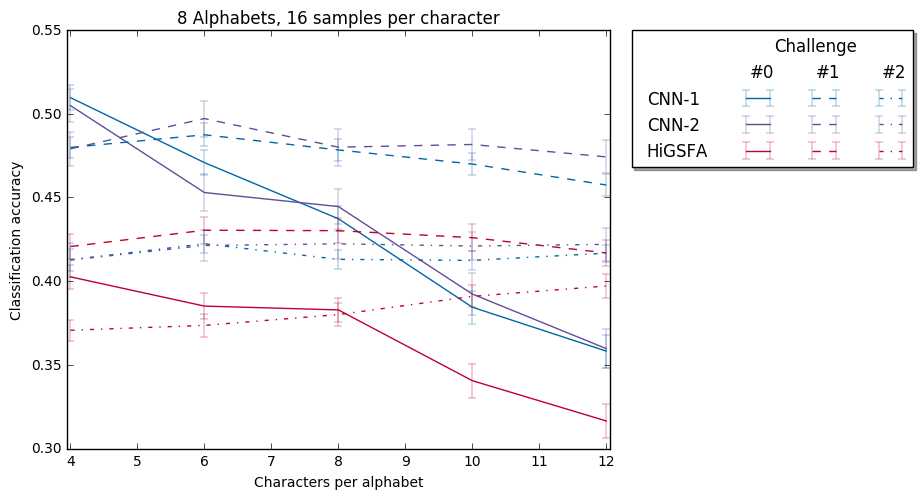

In [13]:
samples_lengths = [4, 6, 8, 10, 12]
title = "Characters per alphabet"
title1 = "8 Alphabets, 16 samples per character"
plot_mnist_errorbars(omniglot_results[0], omniglot_stdev[0], omniglot_results[1], omniglot_stdev[1],
                         omniglot_results[2], omniglot_stdev[2], samples_lengths, title, 
                        "Challenge 0 \n" + title1 )
plot_mnist_errorbars(omniglot_results[3], omniglot_stdev[3], omniglot_results[4], omniglot_stdev[4],
                         omniglot_results[5], omniglot_stdev[5], samples_lengths, title, 
                        "Challenge 1 \n" + title1, '--')
plot_mnist_errorbars(omniglot_results[6], omniglot_stdev[6], omniglot_results[7], omniglot_stdev[7],
                         omniglot_results[8], omniglot_stdev[8], samples_lengths, title, 
                        "Challenge 2 \n" + title1 , '-.')
plot_omniglot_errorbars(omniglot_results[0], omniglot_stdev[0], omniglot_results[1], omniglot_stdev[1],
                         omniglot_results[2], omniglot_stdev[2],
                         omniglot_results[3], omniglot_stdev[3], omniglot_results[4], omniglot_stdev[4],
                         omniglot_results[5], omniglot_stdev[5],
                         omniglot_results[6], omniglot_stdev[6], omniglot_results[7], omniglot_stdev[7],
                         omniglot_results[8], omniglot_stdev[8], samples_lengths,
                         title,
                         title1)